<a href="https://colab.research.google.com/github/zberis/DSPS_ZBeris/blob/main/labs/kerasmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train = x_train.astype(float) / 255.
#y_train = y_train.astype(float) / 255.
x_test = x_test.astype(float) / 255.
#y_test = y_test.astype(float) / 255.

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

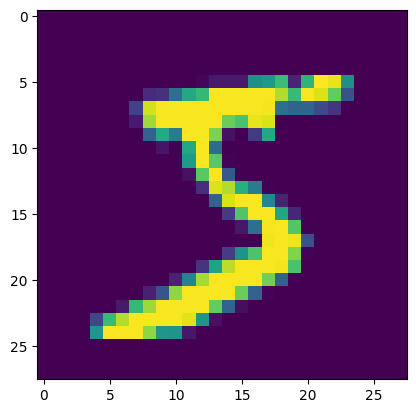

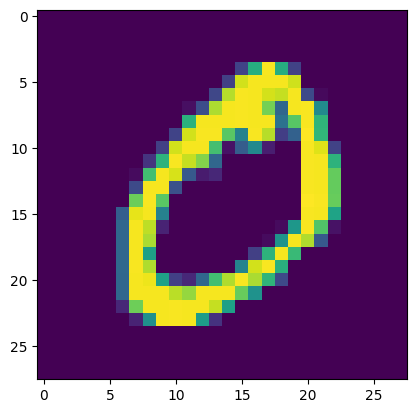

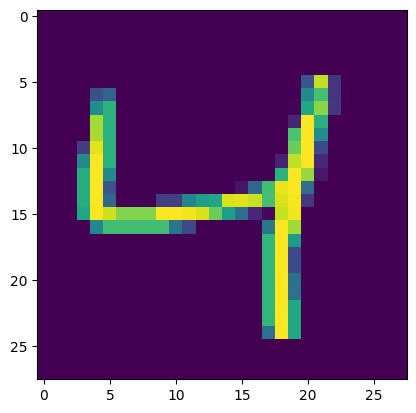

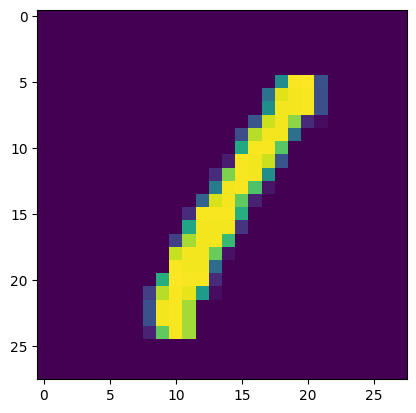

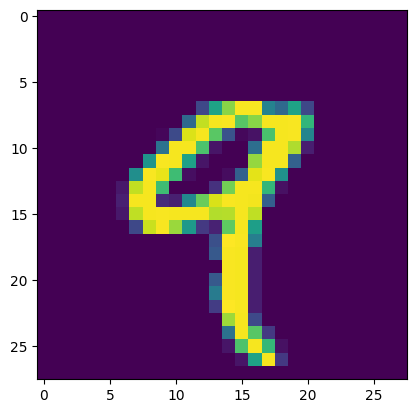

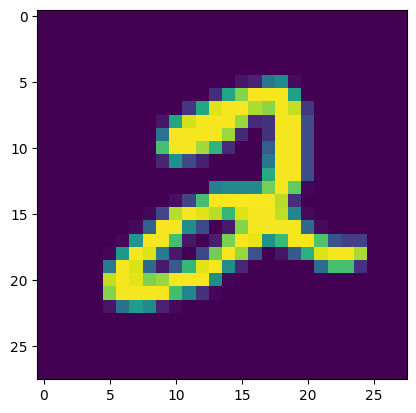

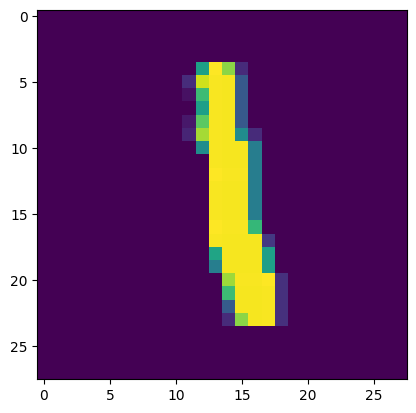

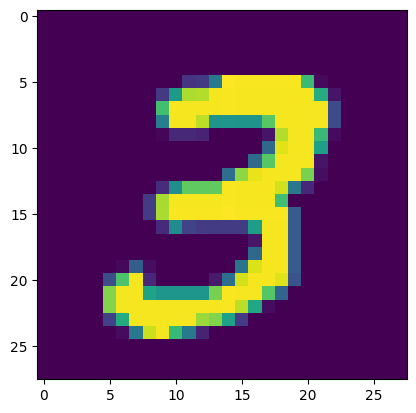

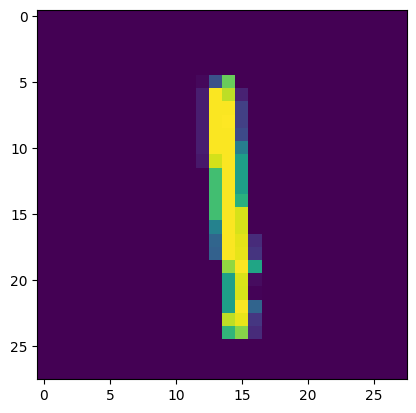

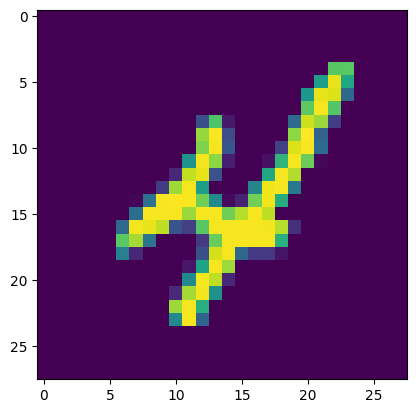

In [ ]:
for i in range(10):
  plt.imshow(x_train[i])
  plt.show()

In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
x_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_testraveled = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [ ]:
x_trainraveled.shape
x_testraveled.shape

(10000, 784)

In [ ]:
mlp = keras.Sequential([
    layers.Dense(320, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(32, activation="sigmoid"),
    layers.Dense(10, activation='softmax')
])

In [ ]:
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = mlp.fit(x_trainraveled, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4950 - loss: 1.8781 - val_accuracy: 0.8906 - val_loss: 0.6990
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9003 - loss: 0.5664 - val_accuracy: 0.9296 - val_loss: 0.3219
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9349 - loss: 0.2834 - val_accuracy: 0.9461 - val_loss: 0.2200
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9517 - loss: 0.1948 - val_accuracy: 0.9565 - val_loss: 0.1710
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9645 - loss: 0.1412 - val_accuracy: 0.9582 - val_loss: 0.1529
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9702 - loss: 0.1164 - val_accuracy: 0.9637 - val_loss: 0.1294
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9765 - loss: 0.0919 - val_accuracy: 0.9662 - val_loss: 0.1198
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9819 - loss: 0.0734 - val_accuracy: 0

In [ ]:
history.history

{'accuracy': [0.701711118221283,
  0.9102444648742676,
  0.9388222098350525,
  0.9537555575370789,
  0.9640666842460632,
  0.9715333580970764,
  0.9762222170829773,
  0.9811111092567444,
  0.9837333559989929,
  0.9869555830955505],
 'loss': [1.4153127670288086,
  0.46880680322647095,
  0.25908026099205017,
  0.18180882930755615,
  0.13925091922283173,
  0.11160111427307129,
  0.09208350628614426,
  0.07535868138074875,
  0.06307345628738403,
  0.052096523344516754],
 'val_accuracy': [0.8906000256538391,
  0.9296000003814697,
  0.946066677570343,
  0.9565333127975464,
  0.9581999778747559,
  0.9637333154678345,
  0.9661999940872192,
  0.9680666923522949,
  0.9696666598320007,
  0.9695333242416382],
 'val_loss': [0.6989769339561462,
  0.32186707854270935,
  0.22002415359020233,
  0.17100340127944946,
  0.15285637974739075,
  0.1293632686138153,
  0.11978689581155777,
  0.11391767859458923,
  0.1035686731338501,
  0.10303766280412674]}

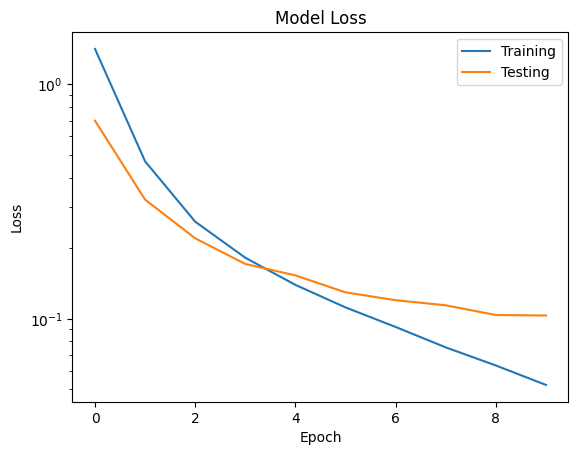

In [ ]:
plt.plot(history.history['loss'], label = "Training")
plt.plot(history.history['val_loss'], label = "Testing")
plt.title('Model Loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.yscale('log')
plt.show()

In [ ]:
mlp.evaluate(x_testraveled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9694 - loss: 0.1055


[0.0965062752366066, 0.9710999727249146]